In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import datetime
# from nltk.tokenize import word_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [2]:
df = pd.read_csv("./data/NYC_Restaurant_Inspection_Results.csv")
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41474212,86 BEST BAKERY,BROOKLYN,1957,86 STREET,11214.0,7189961310,Bakery,02/16/2018,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,39.0,NaN,NaN,06/28/2018,Cycle Inspection / Initial Inspection
1,50059903,CHINA TASTE,MANHATTAN,1570,2ND AVE,10028.0,2126500189,Chinese,02/07/2018,Establishment re-opened by DOHMH,10F,Non-food contact surface improperly constructe...,Not Critical,3.0,P,02/07/2018,06/28/2018,Cycle Inspection / Reopening Inspection
2,50018601,BELLA PIZZA & RESTAURANT,BROOKLYN,208,LIVINGSTON ST,11201.0,7185224100,Pizza,09/10/2015,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,10.0,A,09/10/2015,06/28/2018,Cycle Inspection / Initial Inspection
3,40576044,CIPRIANI DOWNTOWN RESTAURANT,MANHATTAN,376,WEST BROADWAY,10012.0,2123430999,Italian,05/02/2018,Establishment Closed by DOHMH. Violations wer...,05A,Sewage disposal system improper or unapproved.,Critical,81.0,NaN,NaN,06/28/2018,Cycle Inspection / Initial Inspection
4,50063777,EL GALLO TAQUERIA,BROOKLYN,214,HIGHLAWN AVE,11223.0,9176682332,Mexican,02/14/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,02/14/2018,06/28/2018,Cycle Inspection / Re-inspection


In [9]:
df[df['VIOLATION CODE'] =='08A'].head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41474212,86 BEST BAKERY,BROOKLYN,1957,86 STREET,11214.0,7189961310,Bakery,02/16/2018,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,39.0,NaN,NaN,06/28/2018,Cycle Inspection / Initial Inspection
10,40594026,VINCENTS BAGEL,STATEN ISLAND,500,HENDERSON AVENUE,10310.0,7187207335,Delicatessen,05/14/2018,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,23.0,Z,05/14/2018,06/28/2018,Cycle Inspection / Re-inspection
27,41463456,DUNKIN' DONUTS,STATEN ISLAND,2425,HYLAN BOULEVARD,10306.0,7183514967,Donuts,01/14/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,12.0,A,01/14/2016,06/28/2018,Cycle Inspection / Initial Inspection
42,41647741,THE STANDARD EAST VILLAGE,MANHATTAN,25,COOPER SQUARE,10003.0,2124755700,American,12/19/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,75.0,NaN,NaN,06/28/2018,Cycle Inspection / Initial Inspection
45,50070170,SHABU SHABU MACORON,MANHATTAN,61,DELANCEY ST,10002.0,2129255220,Japanese,06/14/2018,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,19.0,Not Yet Graded,NaN,06/28/2018,Cycle Inspection / Initial Inspection


In [3]:
len(df.DBA.unique())

20759

In [4]:
print('different claim id',len(df.CAMIS.unique()))
print(df.shape)    ## some row share smae camis

different claim id 26502
(371855, 18)


In [5]:
df.BORO.unique()

array(['BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'BRONX',
       'Missing'], dtype=object)

In [10]:
df.GRADE.unique()

array([nan, 'P', 'A', 'Z', 'B', 'Not Yet Graded', 'C'], dtype=object)

In [11]:
len(df[df.GRADE=='Z'])

3696

In [ ]:
## query to filter

In [47]:
df.query("GRADE == 'A'")[['SCORE','GRADE']].dropna(subset=['GRADE']).sort_values(by=['SCORE'],ascending=True).groupby(['SCORE','GRADE'])['SCORE'].count()

SCORE  GRADE
-1.0   A            1
 0.0   A          730
 2.0   A         3559
 3.0   A         1733
 4.0   A         3729
 5.0   A         5052
 6.0   A         2548
 7.0   A        13180
 8.0   A         6477
 9.0   A        17140
 10.0  A        18885
 11.0  A        17544
 12.0  A        33064
 13.0  A        23936
 14.0  A            3
 15.0  A            2
 16.0  A            4
 17.0  A           10
 18.0  A            2
 19.0  A            6
 20.0  A            1
 21.0  A            5
 22.0  A            2
 26.0  A            2
 27.0  A            8
 32.0  A            2
 35.0  A            3
Name: SCORE, dtype: int64

In [23]:
print(not True)

False


In [6]:
## phone number may be a good indicator for a restaurant
## because the dataset contains inspecitions record through severeal years. one restaurant can have >1 record 
print(len(df.PHONE.unique()))  
print(df.PHONE.isnull().sum())

25132
2


In [5]:
import collections
a = collections.Counter(df.PHONE)
b=[]
for key, cnt in a.items():
    if cnt > 1:
        b.append(key)
print('num of phone appear multipile times',len(b))
print(a.most_common(10))
print('unique', len(df.PHONE.unique()))
## some chain restaurant with same phone number

num of phone appear multipile times 23884
[('7185958100', 195), ('7186566210', 181), ('__________', 167), ('2124656273', 151), ('9176186310', 143), ('7182153308', 140), ('9172843260', 114), ('2125867610', 110), ('2126159700', 93), ('2122441111', 90)]
unique 25132


In [37]:
datetime.datetime.strptime('05/23/2018', "%m/%d/%Y")

datetime.datetime(2018, 5, 23, 0, 0)

In [6]:
col_a = pd.to_datetime(df['INSPECTION DATE'])

In [7]:
col_a[:2]

0   2015-05-12
1   2015-11-18
Name: INSPECTION DATE, dtype: datetime64[ns]

In [8]:
df['VIOLATION CODE'].unique()

array(['02G', '04N', '08A', '06F', '06D', '06C', '04K', '06E', '02B',
       '10I', '15F', nan, '09C', '04J', '22F', '10B', '04L', '04M', '10F',
       '15L', '04C', '02H', '16A', '20D', '02A', '04A', '10E', '20F',
       '10H', '22C', '04H', '05H', '06A', '09B', '05D', '22A', '08C',
       '03B', '03A', '05E', '16C', '06B', '05C', '10J', '04O', '16E',
       '03E', '09A', '16B', '15A', '10D', '10A', '22B', '18F', '05A',
       '04F', '22G', '02C', '20A', '16D', '02F', '15I', '10C', '15J',
       '05F', '08B', '02I', '06G', '04E', '22E', '04D', '10G', '15K',
       '03C', '15S', '04B', '07A', '03G', '15E', '02D', '20E', '06H',
       '18C', '15T', '18D', '05B', '20B', '02E', '17A', '04G', '18B',
       '18G', '03D', '03F', '06I', '16F', '19A', '02J', '04I', '05I', '15H'], dtype=object)

In [8]:
len(df['VIOLATION CODE'].unique())

100

In [9]:
df['CRITICAL FLAG'].unique()

array(['Critical', 'Not Critical', 'Not Applicable'], dtype=object)

In [8]:
## missing value number in df
df['SCORE'].isnull().sum()

19908

In [58]:
df['ACTION'].unique()

array(['Violations were cited in the following area(s).',
       'Establishment re-opened by DOHMH', nan,
       'Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.',
       'No violations were recorded at the time of this inspection.',
       'Establishment re-closed by DOHMH'], dtype=object)

In [7]:
len(df['ACTION'].unique())

6

In [11]:
df['INSPECTION TYPE'].unique()

array(['Cycle Inspection / Initial Inspection',
       'Cycle Inspection / Re-inspection',
       'Cycle Inspection / Reopening Inspection',
       'Smoke-Free Air Act / Initial Inspection', nan,
       'Inter-Agency Task Force / Initial Inspection',
       'Pre-permit (Operational) / Re-inspection',
       'Smoke-Free Air Act / Re-inspection',
       'Trans Fat / Initial Inspection',
       'Administrative Miscellaneous / Initial Inspection',
       'Pre-permit (Operational) / Initial Inspection',
       'Trans Fat / Re-inspection',
       'Pre-permit (Operational) / Compliance Inspection',
       'Calorie Posting / Initial Inspection',
       'Cycle Inspection / Compliance Inspection',
       'Administrative Miscellaneous / Re-inspection',
       'Pre-permit (Non-operational) / Initial Inspection',
       'Cycle Inspection / Second Compliance Inspection',
       'Pre-permit (Operational) / Reopening Inspection',
       'Administrative Miscellaneous / Compliance Inspection',
       'P

In [6]:
len(df['INSPECTION TYPE'].unique())

35

In [17]:
small_df = df[:100]
small_df.shape

(100, 18)

In [16]:
%timeit -n 1000 small_df.apply(lambda x: x.count(), axis=1)

3.87 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
%timeit -n 1000 small_df.isnull().sum(axis=1)

499 µs ± 16.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
## check missing value for each column
missing_value = df.isnull().sum(axis=0)
missing_value

CAMIS                         0
DBA                         505
BORO                          0
BUILDING                    170
STREET                        4
ZIPCODE                       4
PHONE                         4
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                     1218
VIOLATION CODE             6134
VIOLATION DESCRIPTION      7395
CRITICAL FLAG                 0
SCORE                     20238
GRADE                    186626
GRADE DATE               188705
RECORD DATE                   0
INSPECTION TYPE            1218
dtype: int64

In [26]:
missing_value.index

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [40]:
df_missing = pd.DataFrame({'column_name': missing_value.index, 'missing_num': missing_value.values})
df_missing.sort_values(by=['missing_num'])

,column_name,missing_num
0,CAMIS,0
1,CRITICAL FLAG,0
2,RECORD DATE,0
3,CUISINE DESCRIPTION,0
4,INSPECTION DATE,0
5,BORO,0
7,PHONE,4
8,STREET,4
6,ZIPCODE,4
9,BUILDING,170


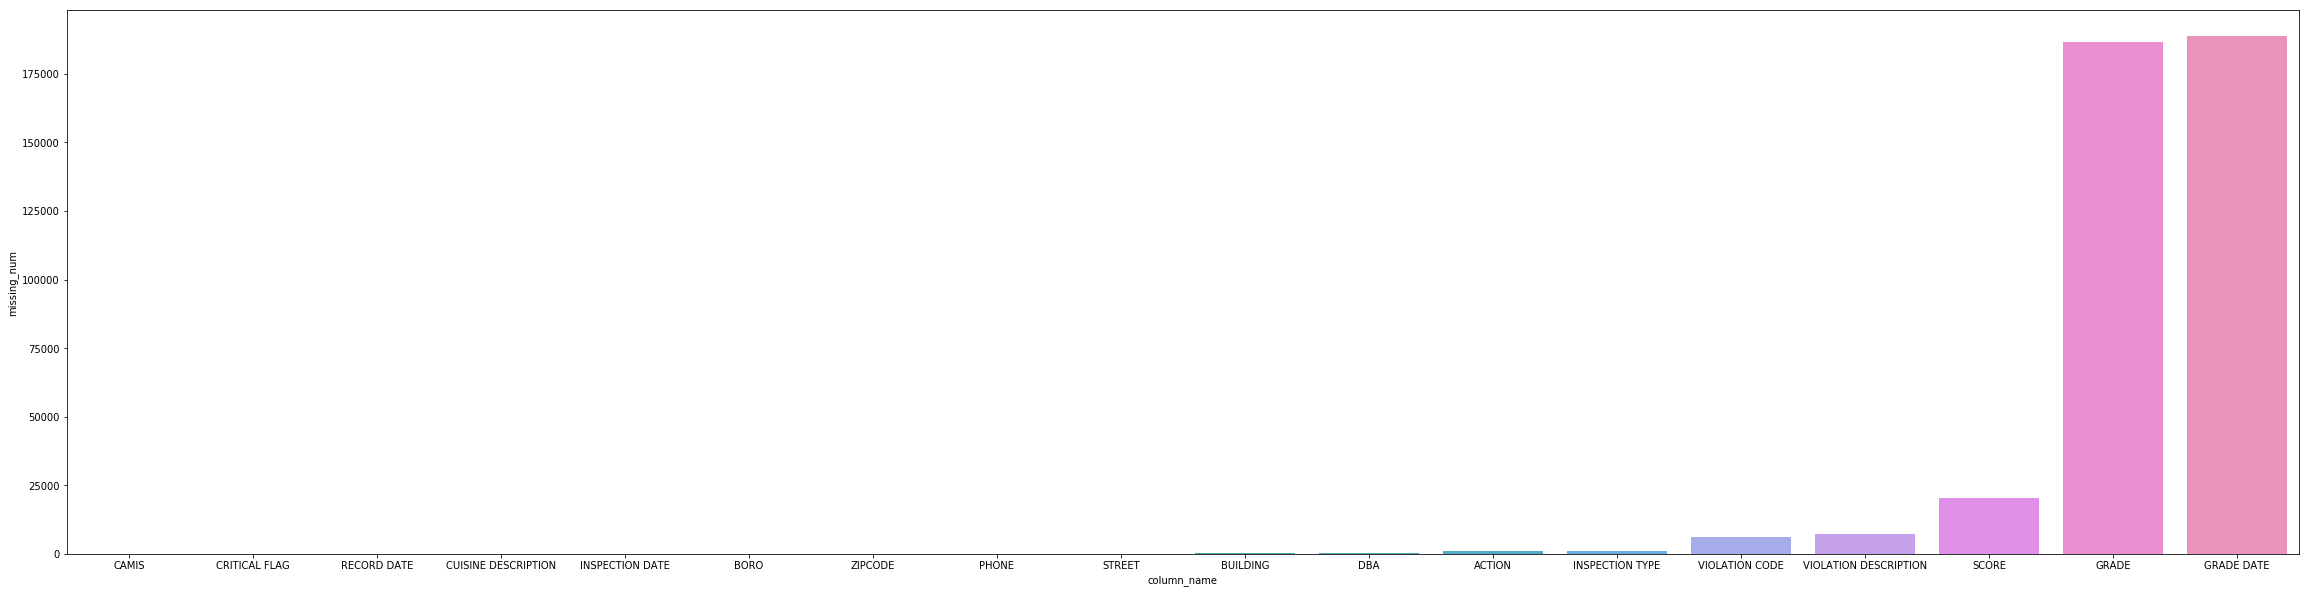

In [48]:
fig, ax =plt.subplots(figsize = (40,10))
missing_plot_sns = sns.barplot(x='column_name', y='missing_num',data=df_missing)
plt.show()

In [56]:
x_pos = np.arange(len(df_missing.column_name))
fig, ax=plt.subplots(figsize=(40, 10))
ax.bar(x_pos, df_missing.missing_num,align='center')
plt.xticks(x_pos, df_missing.column_name)

([<matplotlib.axis.XTick at 0x11029a0f0>,
 <a list of 18 Text xticklabel objects>)

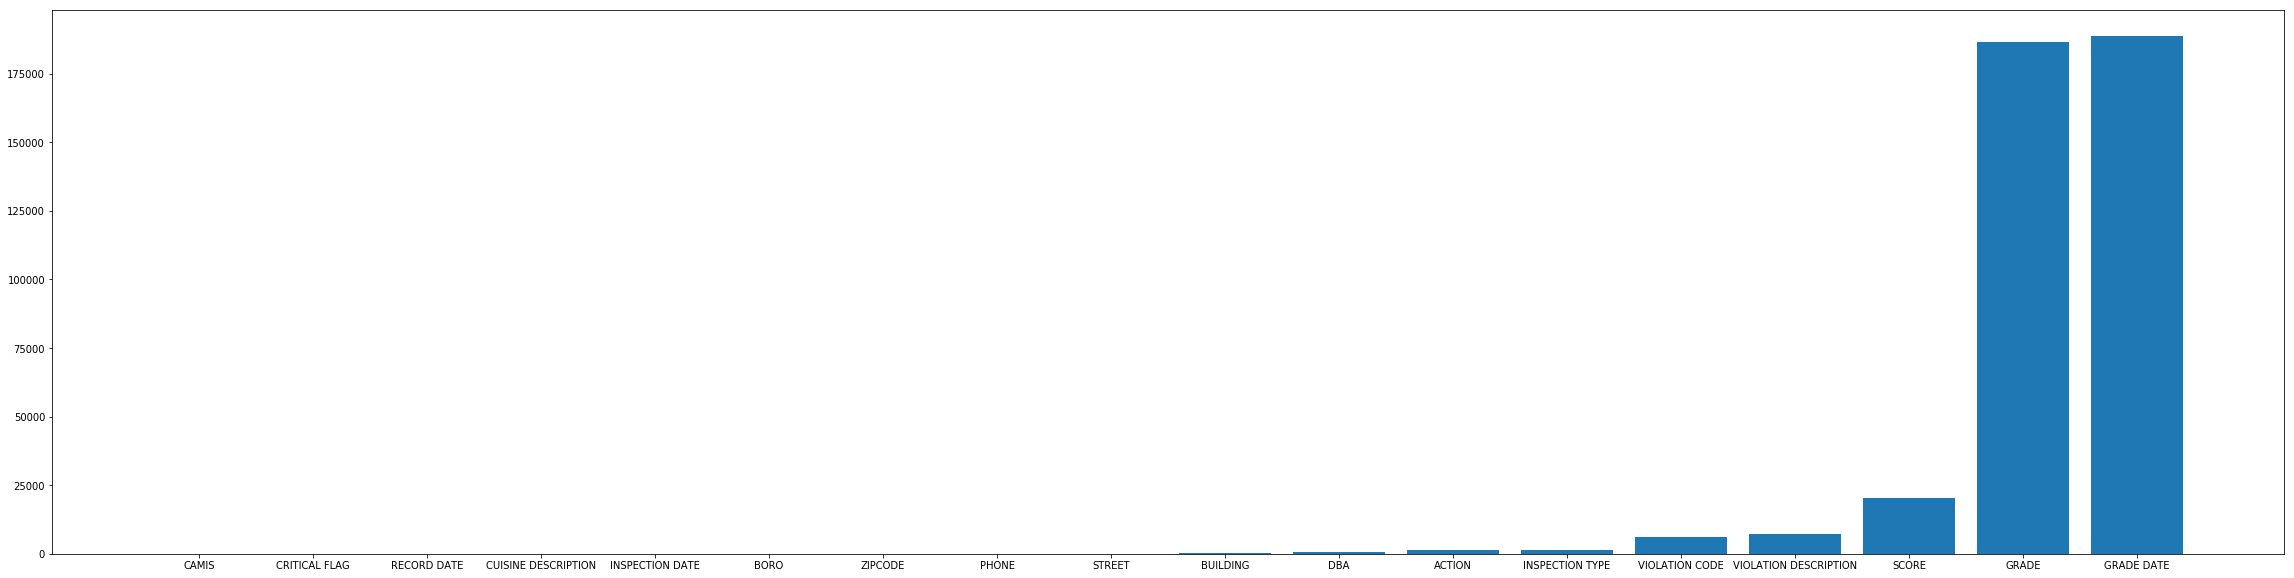

In [57]:
plt.show()

In [59]:
 ## phone number as id, critical flag, cusine description, inspection date (2018), violocation code, violation desc
df['INSPECTION DATE']=pd.to_datetime(df['INSPECTION DATE'])
df['INSPECTION DATE'] > '2017-12-31'

0         False
1         False
2         False
3         False
4          True
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17         True
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28         True
29        False
          ...  
372931    False
372932    False
372933    False
372934    False
372935    False
372936    False
372937    False
372938     True
372939    False
372940    False
372941    False
372942     True
372943    False
372944    False
372945    False
372946    False
372947    False
372948    False
372949    False
372950    False
372951    False
372952    False
372953    False
372954    False
372955    False
372956    False
372957     True
372958    False
372959     True
372960    False
Name: INSPECTION DATE, d

In [60]:
df_2018 = df[df['INSPECTION DATE'] > '2017-12-31']
df_2018.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
4,50017755,CALEDONIA,MANHATTAN,1609,2ND AVE,10028.0,2127344300,Irish,2018-01-27,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,01/27/2018,05/15/2018,Cycle Inspection / Initial Inspection
17,50007857,DON PANCHOLO LECHONERA RESTAURANT,BRONX,2037,JEROME AVE,10453.0,7185832979,"Latin (Cuban, Dominican, Puerto Rican, South &...",2018-01-22,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,Not Critical,11.0,A,01/22/2018,05/15/2018,Cycle Inspection / Re-inspection
28,50005789,KASHMIR,MANHATTAN,478,9TH AVE,10018.0,2127367745,Pakistani,2018-03-07,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,35.0,NaN,NaN,05/15/2018,Cycle Inspection / Initial Inspection
32,50057272,11 HANOVER GREEK,MANHATTAN,11,HANOVER SQ,10005.0,2127854000,Greek,2018-02-21,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,74.0,NaN,NaN,05/15/2018,Cycle Inspection / Initial Inspection
39,50001029,EL VIEJO GRAN CAFE,BRONX,498,E 138TH ST,10454.0,7189933932,Spanish,2018-05-10,Violations were cited in the following area(s).,02H,Food not cooled by an approved method whereby ...,Critical,25.0,Z,05/10/2018,05/15/2018,Cycle Inspection / Re-inspection


In [61]:
df_2018.shape

(63462, 18)

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [70]:
pd.DataFrame({'token_desc': list(map(word_tokenize, test))})

,token_desc
0,"[hey, how, are, you]"
1,"[i, m, good, ,, thank, you, !]"


In [10]:
test = ['hey how are you', 'i m good, thank you !']
a = pd.DataFrame({'token_desc': list(map(word_tokenize, test))})
a['token_desc'][1]

['i', 'm', 'good', ',', 'thank', 'you', '!']

In [82]:
[w for w in a['token_desc'][1] if w not in stopwords.words('english')[:10] and w not in punctuation]

['m', 'good', 'thank']

In [73]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [85]:
a['clean']=list(map(lambda x: [w for w in x if w not in stopwords.words('english')[:10] and w not in punctuation], a['token_desc']))

In [86]:
a

,token_desc,clean
0,"[hey, how, are, you]","[hey, how, are]"
1,"[i, m, good, ,, thank, you, !]","[m, good, thank]"


### clean the column 'Violation description', decode to remove special characters, remove the stop words and punctuations

In [18]:
df_2018['violation_desc_token'] = list(map(word_tokenize, list(small_df['VIOLATION DESCRIPTION'])))

TypeError: expected string or bytes-like object

In [19]:
for i in map(word_tokenize, small_df['VIOLATION DESCRIPTION']):
    print(i)

['Facility', 'not', 'vermin', 'proof', '.', 'Harborage', 'or', 'conditions', 'conducive', 'to', 'attracting', 'vermin', 'to', 'the', 'premises', 'and/or', 'allowing', 'vermin', 'to', 'exist', '.']
['Non-food', 'contact', 'surface', 'improperly', 'constructed', '.', 'Unacceptable', 'material', 'used', '.', 'Non-food', 'contact', 'surface', 'or', 'equipment', 'improperly', 'maintained', 'and/or', 'not', 'properly', 'sealed', ',', 'raised', ',', 'spaced', 'or', 'movable', 'to', 'allow', 'accessibility', 'for', 'cleaning', 'on', 'all', 'sides', ',', 'above', 'and', 'underneath', 'the', 'unit', '.']
['Non-food', 'contact', 'surface', 'improperly', 'constructed', '.', 'Unacceptable', 'material', 'used', '.', 'Non-food', 'contact', 'surface', 'or', 'equipment', 'improperly', 'maintained', 'and/or', 'not', 'properly', 'sealed', ',', 'raised', ',', 'spaced', 'or', 'movable', 'to', 'allow', 'accessibility', 'for', 'cleaning', 'on', 'all', 'sides', ',', 'above', 'and', 'underneath', 'the', 'unit'

TypeError: expected string or bytes-like object

In [15]:
a_sent = 'Cold food item held above 41√Ç¬∫ F (smoked fish and reduced oxygen packaged foods above 38 √Ç¬∫F) except during necessary preparation.'
word_tokenize(a_sent)

['Cold',
 'food',
 'item',
 'held',
 'above',
 '41√Ç¬∫',
 'F',
 '(',
 'smoked',
 'fish',
 'and',
 'reduced',
 'oxygen',
 'packaged',
 'foods',
 'above',
 '38',
 '√Ç¬∫F',
 ')',
 'except',
 'during',
 'necessary',
 'preparation',
 '.']

In [20]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each